In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')


In [ ]:
paths = []
labels= []
for dirname, _, filenames in os.walk('/content/drive/MyDrive/TESS Toronto emotional speech set data'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
        break

print('Dataset loaded')

Dataset loaded


In [ ]:
paths[:5]

['/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_neutral/YAF_back_neutral.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_angry/YAF_bar_angry.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/YAF_happy/YAF_cause_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_happy/YAF_bite_happy.wav',
 '/content/drive/MyDrive/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data/YAF_fear/YAF_bite_fear.wav']

In [ ]:
labels[:5]

['neutral', 'angry', 'happy', 'happy', 'fear']

In [ ]:
##data frame
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,/content/drive/MyDrive/TESS Toronto emotional ...,neutral
1,/content/drive/MyDrive/TESS Toronto emotional ...,angry
2,/content/drive/MyDrive/TESS Toronto emotional ...,happy
3,/content/drive/MyDrive/TESS Toronto emotional ...,happy
4,/content/drive/MyDrive/TESS Toronto emotional ...,fear


In [ ]:
df['label'].value_counts()

,count
label,
neutral,4
angry,4
happy,4
fear,4
ps,4
sad,4
disgust,4


<Axes: xlabel='label', ylabel='count'>

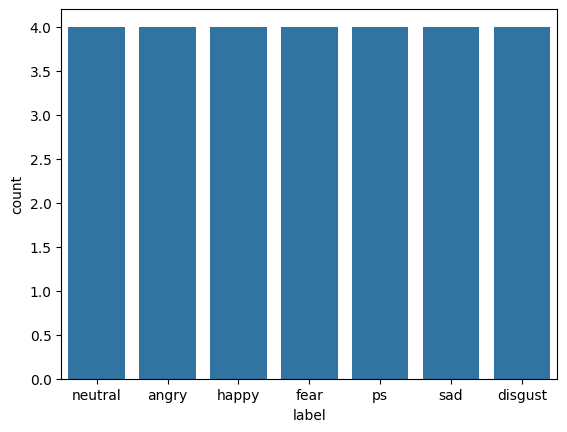

In [ ]:
sns.countplot(data=df,x='label')

In [ ]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

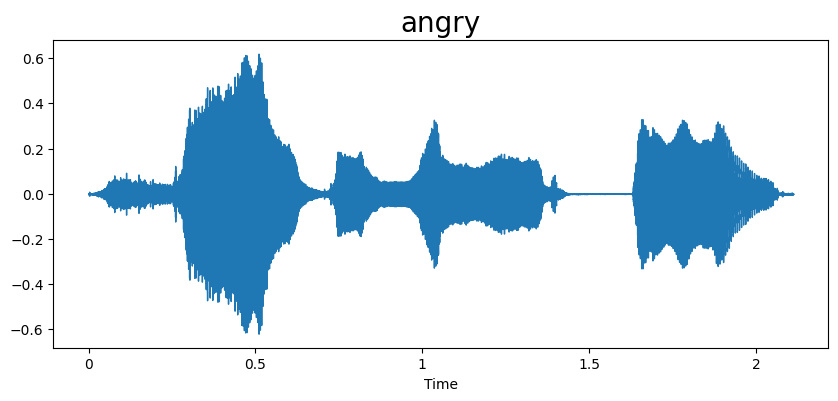

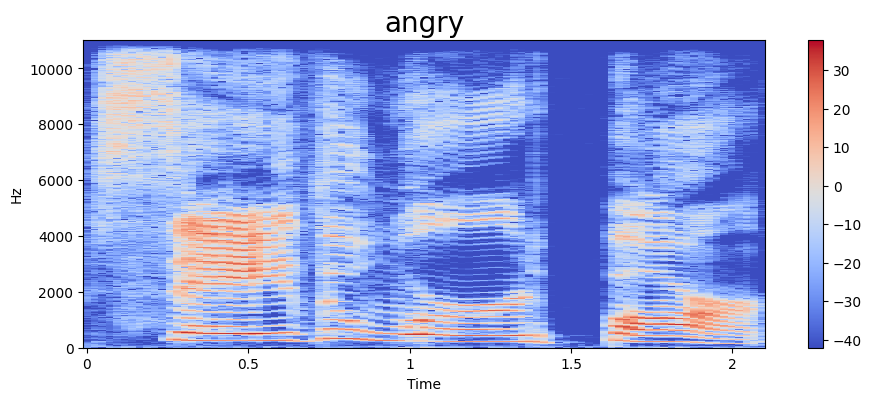

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

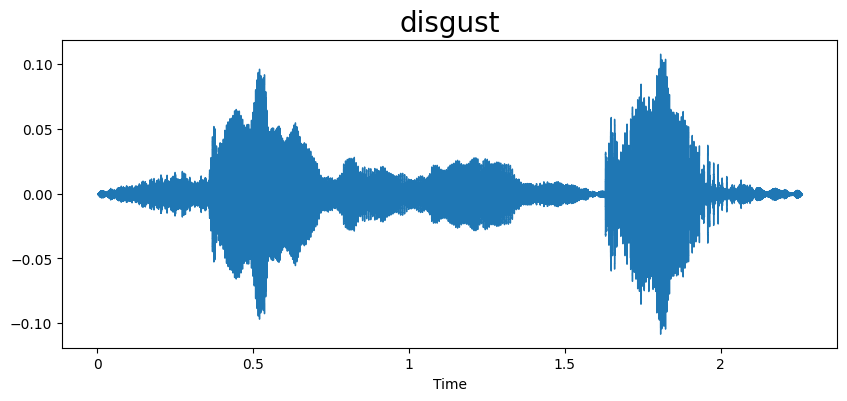

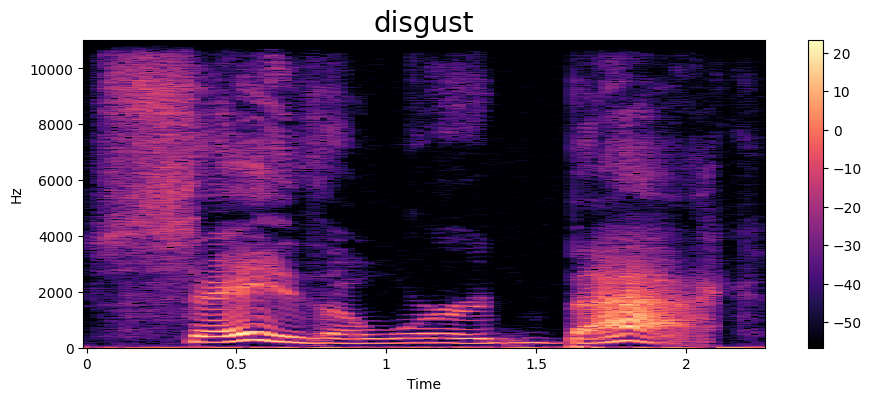

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

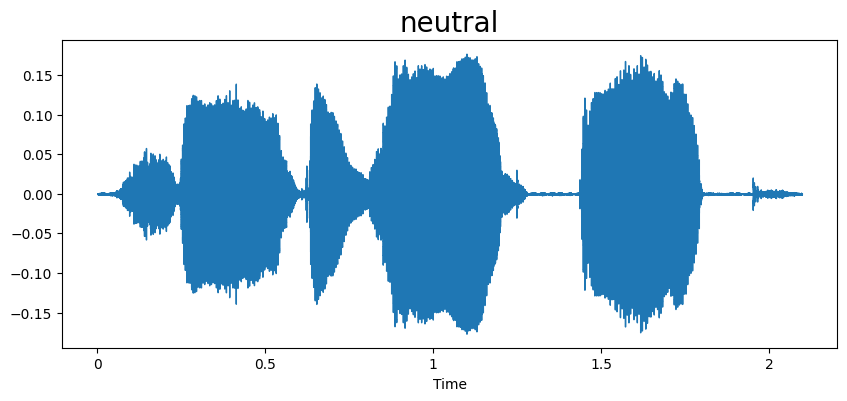

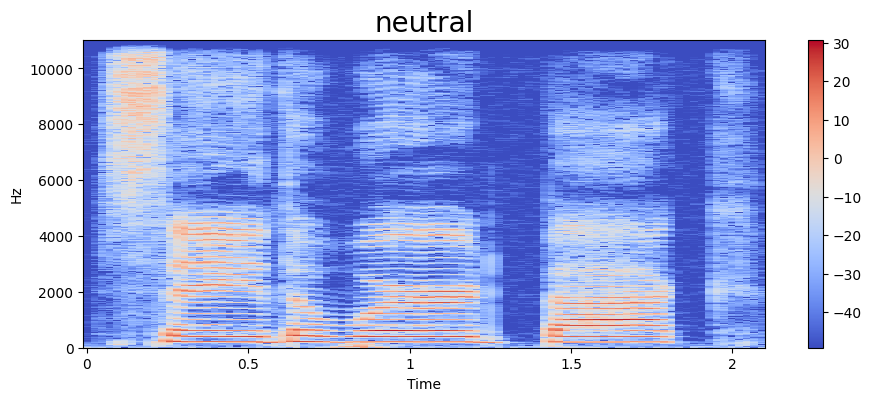

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

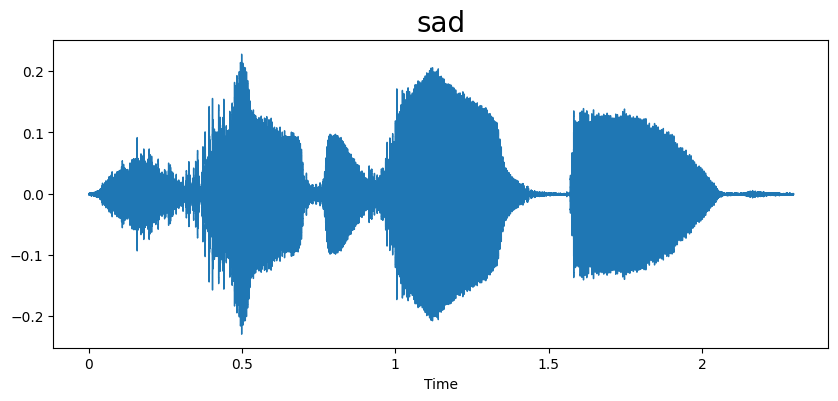

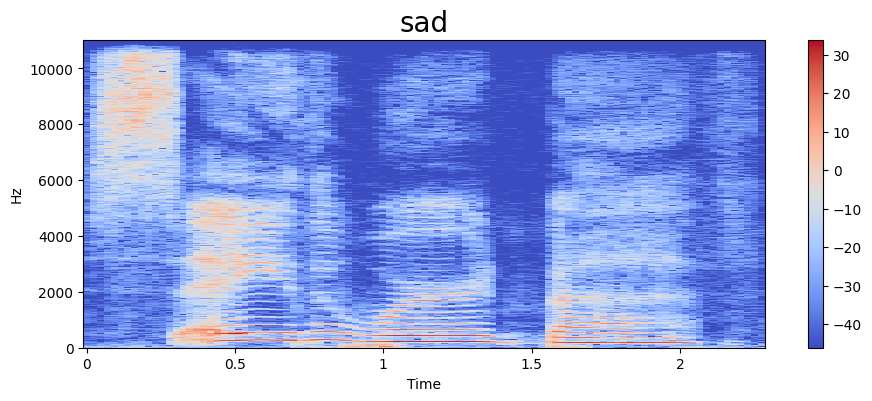

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

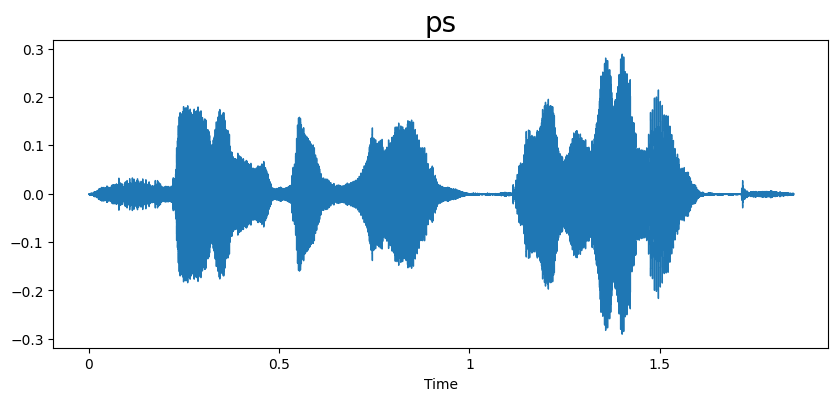

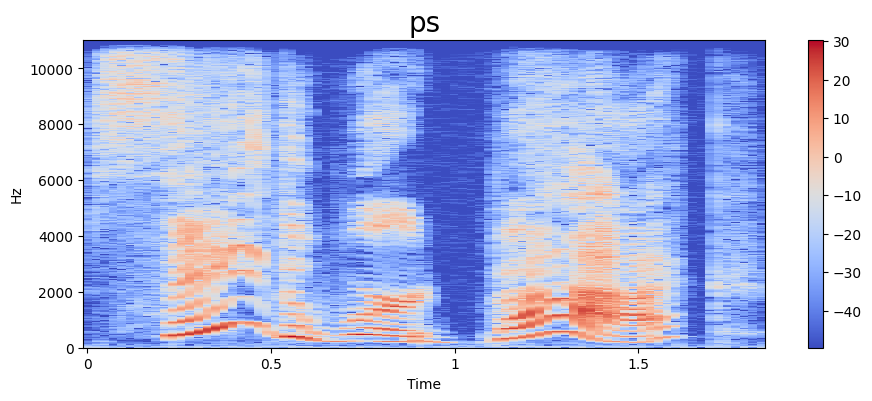

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

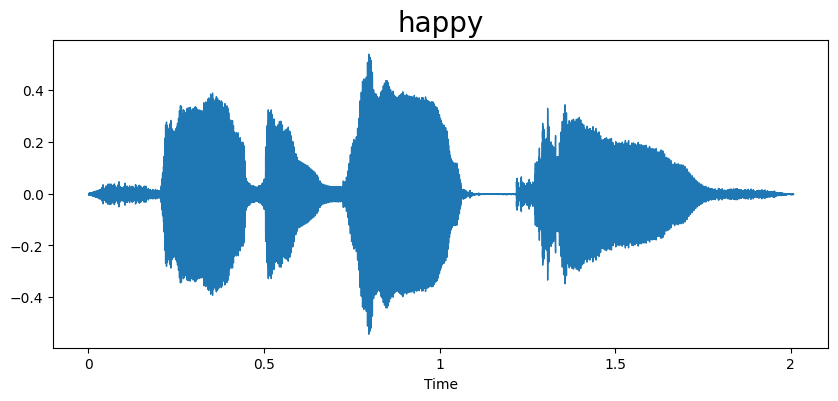

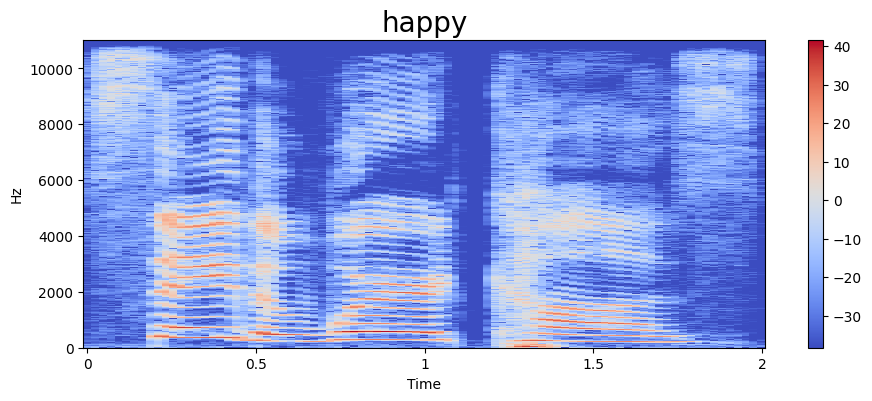

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y,sr=librosa.load(filename,duration=3,offset=0.5)
    mfcc=np.mean(librosa.feature.mfcc(y=y,sr=sr,n_mfcc=40).T,axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-3.9381622e+02,  9.1653290e+01, -1.8699921e+01,  1.2519554e+01,
        4.9414349e+00, -2.4684122e+00, -3.5883958e+00, -1.5413574e+01,
        4.8596125e+00,  1.0789954e+01, -1.8506725e+01,  1.2248492e+01,
       -5.2755947e+00,  3.1111915e+00,  3.5982969e+00, -8.9580297e+00,
       -2.2334414e+00, -1.5505089e+00, -9.4699039e+00,  9.4918237e-04,
       -3.4176929e+00, -4.3015738e+00, -5.3037086e+00, -2.6001308e+00,
       -2.2155864e+00, -3.1146626e+00, -5.2864629e-01, -1.2381748e+00,
       -9.6686249e+00, -4.8760681e+00, -8.6056089e+00,  1.1879572e+01,
        1.3651575e+01,  3.2466110e+01,  3.0009277e+01,  2.3174040e+01,
        7.8771744e+00, -2.3958981e+00, -3.3234634e+00,  2.8642287e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

,speech
0,"[-393.81622, 91.65329, -18.69992, 12.519554, 4..."
1,"[-323.86, 70.17526, -5.0372443, -14.311751, -3..."
2,"[-305.54163, 50.109245, -11.23144, 10.997561, ..."
3,"[-323.1753, 35.721375, -16.336277, 22.842546, ..."
4,"[-336.5271, 45.549076, -12.688638, 7.801941, -..."
5,"[-342.3485, 69.85261, -34.21661, -7.0165615, -..."
6,"[-393.96503, 86.37925, 10.630319, 29.49811, 0...."
7,"[-377.2248, 80.03506, -19.46256, 38.19267, 8.2..."
8,"[-385.71368, 66.5311, -14.540321, 6.119657, 3...."
9,"[-493.02606, 120.17645, 10.212639, -7.618184, ..."


In [ ]:
X=[x for x in X_mfcc]
X=np.array(X)
X.shape

(28, 40)

In [ ]:
#input split
X=np.expand_dims(X,-1)
X.shape

(28, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder()
y=enc.fit_transform(df[['label']])
y

<28x7 sparse matrix of type '<class 'numpy.float64'>'
	with 28 stored elements in Compressed Sparse Row format>

In [ ]:
y =y.toarray()

In [ ]:
y.shape

(28, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 256)                 │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             455 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 305,799 (1.17 MB)

 Trainable params: 305,799 (1.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, validation_split=0.2, epochs=100, batch_size=64)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.9091 - loss: 0.2993 - val_accuracy: 0.8333 - val_loss: 0.5726
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 1.0000 - loss: 0.0652 - val_accuracy: 0.8333 - val_loss: 0.5106
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0945 - val_accuracy: 0.8333 - val_loss: 0.4925
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9545 - loss: 0.1269 - val_accuracy: 0.8333 - val_loss: 0.5398
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0763 - val_accuracy: 0.8333 - val_loss: 0.6073
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9545 - loss: 0.0635 - val_accuracy: 0.8333 - val_loss: 0.7485
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - accuracy: 1.0000 - loss: 0.0940 - val_accuracy: 0.8333 - val_loss: 0.9212
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 1.0000 - loss: 0.0332 - val_accuracy: 0.8333 - val_los

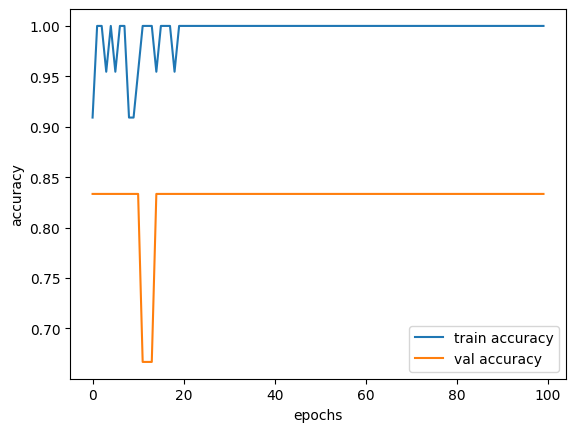

In [ ]:
epochs=list(range(100))
acc=history.history['accuracy']
val_acc=history.history["val_accuracy"]
plt.plot(epochs,acc,label='train accuracy')
plt.plot(epochs,val_acc,label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

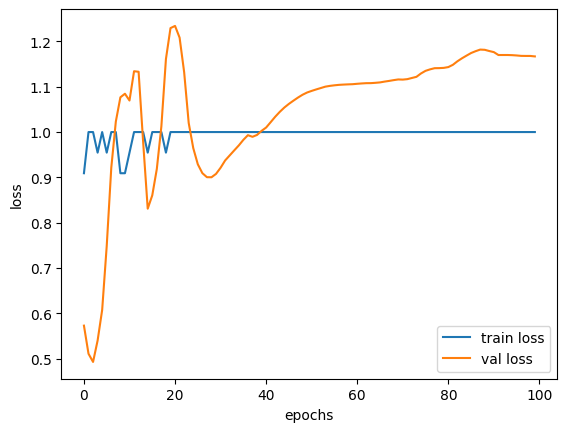

In [ ]:
loss=history.history['accuracy']
val_loss=history.history["val_loss"]
plt.plot(epochs,loss,label='train loss')
plt.plot(epochs,val_loss,label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()